## Dataset_1: reflectance and transmission spec measurements.xlsx -> PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the data
data = pd.read_excel('reflectance and transmission spec measurements.xlsx')

In [3]:
data.head()

wavelength  AacuW_B_Splice17_1.txt  AacuW_B_Splice17_2.txt  \
0         300               13.673750               12.762500   
1         302               14.103333               13.244167   
2         304               14.608824               13.850000   
3         306               14.941905               14.277619   
4         308               15.787273               15.200000   

   AacuW_B_Splice17_3.txt  AacuW_W_Splice17_1.txt  AacuW_W_Splice17_2.txt  \
0               13.027500               15.468750               14.433750   
1               13.402500               15.695833               14.756667   
2               14.061765               16.164118               15.320588   
3               14.519048               16.571905               15.794286   
4               15.480909               17.307727               16.595000   

   AacuW_W_Splice17_3.txt  AclyW_B_Splice17_1.txt  AclyW_B_Splice17_2.txt  \
0               14.433750               11.453750               10.155000   
1               14.756667               11.711667               10.520000   
2               15.320588               11.888824               10.884118   
3               15.794286               12.136667               11.240000   
4               16.595000               12.680455               11.963182   

   AclyW_B_Splice17_3.txt  ...  TmelW_B_Splice17_3.txt  \
0               10.977500  ...               12.127500   
1               11.128333  ...               12.577500   
2               10.999412  ...               13.080000   
3               10.985238  ...               13.406190   
4               11.224545  ...               14.182727   

   TmelW_W_Splice17_1.txt  TmelW_W_Splice17_2.txt  TmelW_W_Splice17_3.txt  \
0               16.188750               17.625000               18.411250   
1               16.595833               18.152500               18.995833   
2               17.232941               18.832353               19.781765   
3               17.633810               19.344286               20.330000   
4               18.449545               20.428636               21.374091   

   TmigW_B_Splice17_1.txt  TmigW_B_Splice17_2.txt  TmigW_B_Splice17_3.txt  \
0               10.313750                9.540000               10.956250   
1               10.715000               10.138333               11.382500   
2               11.049412               10.479412               11.774118   
3               11.304762               10.551429               12.022381   
4               11.955455               11.014545               12.571364   

   TmigW_W_Splice17_1.txt  TmigW_W_Splice17_2.txt  TmigW_W_Splice17_3.txt  
0               17.210000               20.263750               16.757500  
1               17.425833               20.562500               17.045000  
2               17.777647               20.922941               17.643529  
3               18.082857               21.206190               18.090000  
4               18.876818               21.934091               18.904545  

[5 rows x 439 columns]

In [4]:
data.shape

(901, 439)

In [5]:
columns = data.wavelength
variables = data.columns
variables = variables[1:]

In [6]:
# Transposing the data to get the birds into one column
data = data.drop(columns = ['wavelength'])
data = data.T
data.head()

0          1          2          3          4    \
AacuW_B_Splice17_1.txt  13.67375  14.103333  14.608824  14.941905  15.787273   
AacuW_B_Splice17_2.txt  12.76250  13.244167  13.850000  14.277619  15.200000   
AacuW_B_Splice17_3.txt  13.02750  13.402500  14.061765  14.519048  15.480909   
AacuW_W_Splice17_1.txt  15.46875  15.695833  16.164118  16.571905  17.307727   
AacuW_W_Splice17_2.txt  14.43375  14.756667  15.320588  15.794286  16.595000   

                              5          6          7          8          9    \
AacuW_B_Splice17_1.txt  16.626818  17.571364  18.882273  19.949091  21.080952   
AacuW_B_Splice17_2.txt  16.105455  16.895909  17.873182  18.725000  19.853810   
AacuW_B_Splice17_3.txt  16.434545  17.379545  18.461818  19.334545  20.324762   
AacuW_W_Splice17_1.txt  18.067727  19.127727  20.591364  21.665000  22.999048   
AacuW_W_Splice17_2.txt  17.301364  18.202273  19.527727  20.621818  22.085714   

                        ...      891      892     893     894      895  \
AacuW_B_Splice17_1.txt  ...  44.1825  44.4625  44.574  44.794  44.9075   
AacuW_B_Splice17_2.txt  ...  44.1700  44.4600  44.578  44.812  44.9300   
AacuW_B_Splice17_3.txt  ...  43.8650  44.1500  44.268  44.506  44.6275   
AacuW_W_Splice17_1.txt  ...  56.6025  57.1050  57.320  57.738  57.9500   
AacuW_W_Splice17_2.txt  ...  56.4250  56.9275  57.144  57.570  57.7850   

                            896      897    898      899     900  
AacuW_B_Splice17_1.txt  45.0700  45.2125  45.33  45.4375  45.476  
AacuW_B_Splice17_2.txt  45.1000  45.2450  45.35  45.4300  45.452  
AacuW_B_Splice17_3.txt  44.8150  44.9775  45.09  45.1825  45.218  
AacuW_W_Splice17_1.txt  58.2825  58.5650  58.78  58.9500  59.000  
AacuW_W_Splice17_2.txt  58.1250  58.4050  58.62  58.7775  58.812  

[5 rows x 901 columns]

In [7]:
data.shape

(438, 901)

In [8]:
# Center the data (not centered data are just weird)
# We do not need to scale the data because the units are the same for every column
centered = data - data.mean(axis = 0)


In [9]:
# Calculate the covariance matrix
covariance_matrix = np.dot(centered.T, centered) / (centered.shape[0] - 1)
covariance_matrix.shape

(901, 901)

In [10]:
# Perform eigen decompotition
def eig(arr):
    """
    arr: 
            matrix
    
    returns:
            sorted eigenvalues highest to lowest
            sortrd eigenvectors by eigenvalues
    """
    vals, vecs = np.linalg.eigh(arr)
    # Sort eigenvectors and values by eigenvalues
    order = np.argsort(vals)[::-1]
    vals = vals[order]
    vecs = vecs[:, order]

    return vals, vecs

In [11]:
vals, vecs = eig(covariance_matrix)

The scree plot displays how much variation each principal component captures from the data. The first two  PCs are sufficient to describe the essence of the data, the scree plot has a steep curve that bends quickly and flattens out. Both rules (Kaiser, Proportion of variance plot)are met.

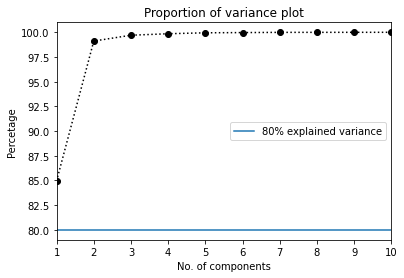

In [12]:
# Scree plot  -> Proportion of variance plot:
plt.plot(np.arange(len(vals)) + 1,100 * vals.cumsum() / sum(vals), 'o:k')

plt.axhline(80, label = '80% explained variance')
plt.title("Proportion of variance plot")
plt.ylabel('Percetage')
plt.xlabel('No. of components')
plt.xlim(1, 10)
plt.legend()
plt.show()

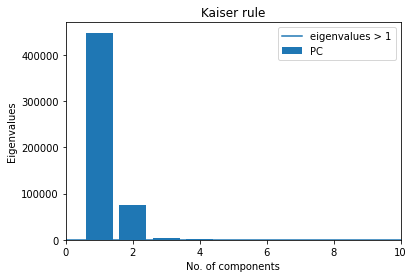

In [13]:
# Scree plot  -> Kaiser rule: 
plt.bar(np.arange(len(vals)) + 1, vals, label = 'PC')

plt.axhline(1, label = 'eigenvalues > 1')
plt.title("Kaiser rule")
plt.ylabel('Eigenvalues')
plt.xlabel('No. of components')
plt.xlim(0, 10)
plt.legend()
plt.show()

In [15]:
# Cumulative sum
s = vals.sum()
for i, (v, c) in enumerate(zip(vals[:2], vals.cumsum()[:2])):
    print('{} {:7.2%} {:7.2%}'.format(i+1, v / s, c / s))

1  84.95%  84.95%
2  14.16%  99.11%


It is clear that the first two princical components capture more than 80% (99.11%) of the total variability so we will choose those two.

In [16]:
# Projections of the data onto the new axis (aka PC1 &PC2)
projections = np.dot(centered,vecs[:, 0:2]) 

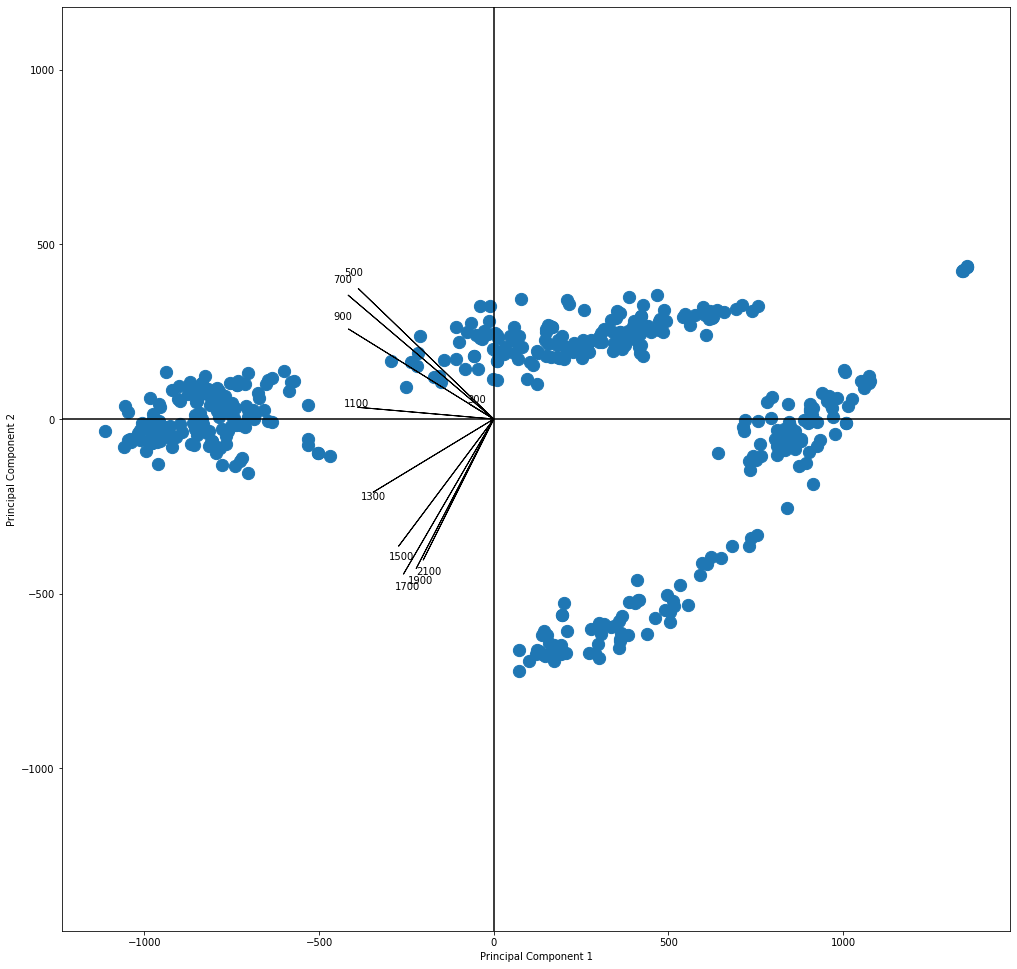

In [17]:

plt.figure(figsize = (17, 17))

# Score plot
plt.scatter(projections[:,0], projections[:,1], s=150) # Projected data

# for var, (x,y) in zip(variables, list(zip(projections[:,0], projections[:,1]))):
#     plt.text(1*x, 1*y, var)



# Loading plot
for col, (x,y) in zip(columns[::100], 10000*vecs[:, :2][::100]):
    plt.arrow(0, 0, x, y, head_width=0.1, color = 'black')
    plt.text(1.1*x, 1.1*y, col)
    
    
    
plt.axis('equal') # The axis should be equal
plt.axvline(0, color = 'black') # PC1
plt.axhline(0, color = 'black') # PC2
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The birds seems to be divided into four groups according to their feather reflectance. Maybe the diference are due to the size of the feathers or the color. PC1 managed to split the two groups from left to right ans PC2  from top to botom. 

The further away the vectors are from a PC origin and the smaller the angle between them is, the more influence they have on that PC.
So, another interesting fact is that most of the vectors (ie, 1100) composing PC1 are 'nearly infared wave lenghs' (After a quick google search that mean that the feathers are shiny and that why they reflect the wave lenght). 

I do not think FA would be a step towords the right direction since the vectors are waves, there is not an underlying factor there. I would suggest lda between black and white birds or between species of birds or even size!

## Please restart the kernel to continue further

## Dataset_2: 'galton.dat' -> MLR

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

In [2]:
# Load data
df = pd.read_csv('galton.dat', sep="\t")

In [3]:
df = df.drop(columns = ['female'])
df.head()

family  father  mother gender  height  kids  male
0      1    78.5    67.0      M    73.2     4   1.0
1      1    78.5    67.0      F    69.2     4   0.0
2      1    78.5    67.0      F    69.0     4   0.0
3      1    78.5    67.0      F    69.0     4   0.0
4      2    75.5    66.5      M    73.5     4   1.0

In [4]:
kids_h = df["height"]

In [5]:
# Pick relavent columns 
# I chose to drop there column because they do not give extra information to my model. 
# The information given by the column 'family' is already captured by the column 'kids'
# The information given by the columns 'female' & 'gender' is already captured by the column 'male'
df = df.drop(columns = ['height', 'family', 'gender'])
df.head()

father  mother  kids  male
0    78.5    67.0     4   1.0
1    78.5    67.0     4   0.0
2    78.5    67.0     4   0.0
3    78.5    67.0     4   0.0
4    75.5    66.5     4   1.0

In [6]:
data = df.values
data

array([[78.5, 67. ,  4. ,  1. ],
       [78.5, 67. ,  4. ,  0. ],
       [78.5, 67. ,  4. ,  0. ],
       ...,
       [68.5, 65. ,  8. ,  0. ],
       [68.5, 65. ,  8. ,  0. ],
       [68.5, 65. ,  8. ,  0. ]])

In [7]:
# Center the data (uncentered data are just weird)
centered = data - data.mean(axis = 0)

In [8]:
# Create my X matrix
X = np.stack((np.ones(centered.shape[0]), centered[:, 0], centered[:, 1], centered[:, 2], centered[:, 3]), axis=1)

In [9]:
y = kids_h

In [10]:
# Compute my coefs
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(b)

[ 6.67606904e+01  3.98305279e-01  3.20955282e-01 -4.38183594e-02
  5.20994674e+00]


Great now that I have the coefs I can see which regressors are positive (parent's hight, and gender) and negative corellated (No. of kids). That makes a lot of sence. Ofcourse the parents and the gender(male is denoted as 1 that's why) of the child would influence its hight.

In [11]:
# Residuals
ypred = X @ b
residuals = y - ypred

In [12]:
# How much of the variance of y is explained by the model?
# If the relationship is perfect, it's 1 (100%)
R2 = 1 - residuals.var() / y.var()

# The adjusted R2 is corrected for the sample size and number of regressors
adjusted_R2 = 1 - ((1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1))

print(R2*100, adjusted_R2*100)


64.0720971407774 63.870707550759334


Well.. this model can explain almost 64% of the total variance of my data. It is not the best model but it is a start.

In [13]:
coef = np.polyfit(y, ypred, deg=1)
curvefit = np.poly1d(coef)

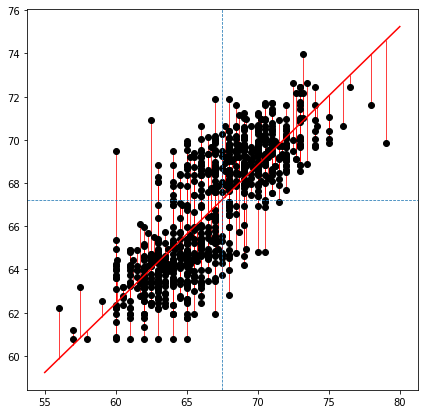

In [16]:
# Plot my model
x = np.linspace(55, 80, 101)
newy = curvefit(x)
plt.figure(figsize = (7, 7))
# The residuals
segs = np.array(((y, y),(ypred, coef[1] + coef[0]*y ))).T
axes = plt.axes()
axes.add_collection(mc.LineCollection(segs, color="red", linewidths=0.75))


plt.plot(y, ypred, 'ok')
plt.plot(x, newy, '-r', label='curve fit')


plt.axvline(x.mean(), ls='--', lw=0.75)
plt.axhline(newy.mean(), ls='--', lw=0.75)
plt.show()

So given the parent's hight the sex of the child and the no. of children in the family (regessors) the model could predict the height of the children. It is a moderate model...

I do not think that any other regression model would work better i.e., PCR needs more variables (ideally more than 4-5) in order to be reliable.

## Please restart kernel to continue

### Dataset_3:  transhydrogenase.csv.gz -> MDS

I believe that performing multidimentional scaling on the data would give us a meaningful insight about the structure of the proteins in space.  

Probably the mutant proteins will have a different 3-D structure... Let's see 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

In [10]:
df = pd.read_csv('transhydrogenase.csv.gz',  sep=',', header=0)
df.head()

Unnamed: 0 variant        x0        y0        z0        x1        y1  \
0           0      WT  2.232662 -0.175234  0.445381  1.430379  0.362950   
1           1      WT  3.128979  0.057618  1.338539  2.272053 -0.152276   
2           2      WT  3.667753 -0.210762  0.915047  2.665825  0.011532   
3           3      WT  3.703590 -0.266571  1.048084  2.949226  0.039815   
4           4      WT  1.998403  0.659392  0.445759  1.526339  0.522686   

         z1        x2        y2  ...      z750      x751      y751      z751  \
0  0.900745  1.328980  0.169134  ... -6.055492  2.278352 -1.216520 -7.968948   
1  1.830578  1.497686 -0.200720  ... -5.384182  2.084931 -0.777718 -6.925377   
2  1.561668  1.802264 -0.424967  ... -6.950081  3.190837 -1.746283 -8.502846   
3  1.500355  2.122021 -0.107710  ... -5.943760  3.890735 -0.656552 -7.033615   
4  0.568974  0.987137  0.083764  ... -6.176762  4.113041 -0.970990 -7.908390   

       x752      y752      z752      x753      y753      z753  
0  1.648216 -0.388278 -7.311485 -0.185457  2.266832 -9.651554  
1  1.764271 -0.837972 -5.649639 -1.866464  1.002639 -7.600162  
2  2.848035 -1.168078 -7.571968 -0.521151  0.882258 -9.594967  
3  3.355130 -0.573520 -5.763386  0.288879  1.581337 -7.494667  
4  3.842464 -0.370223 -7.094711  0.451301  1.645195 -8.377224  

[5 rows x 2264 columns]

The dataset is too big to be computed by a laptop (my laptop). So I would like to do a preliminary test here to see if there is anything significant in the dataset before proceeding to a large scale analysis.

In [11]:
# Subseting the data
df = df.dropna()
df = df.iloc[::30, :]

In [12]:
columns = df.columns
variables = df['variant'] # if needed

In [21]:
# Get the original data into a matrix
X = df.iloc[:, 2:].values
X.shape

(205, 2262)

In [15]:
# Compute the distance matrix
D = ((X[None, :, :] - X[:, None, :])**2).sum(axis=2)
m = D.mean(axis=0)
A = -0.5 * (D - m[:, None] - m[None, :] + m.mean())

In [16]:
# eigen dicomposition
def eig(arr):
    """
    arr: 
            matrix
    
    returns:
            sorted eigenvalues highest to lowest
            sortrd eigenvectors by eigenvalues
    """
    vals, vecs = np.linalg.eigh(arr)
    # Sort eigenvectors and values by eigenvalues
    order = np.argsort(vals)[::-1]
    vals = vals[order]
    vecs = vecs[:, order]

    return vals, vecs

In [17]:
vals, vecs = eig(A)

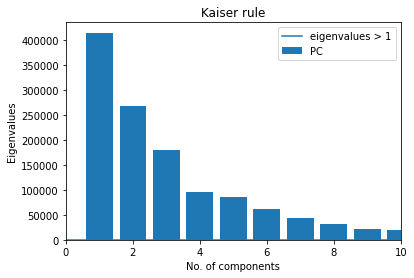

In [18]:
# Scree plot  -> Kaiser rule: 
plt.bar(np.arange(len(vals)) + 1, vals, label = 'PC')

plt.axhline(1, label = 'eigenvalues > 1')
plt.title("Kaiser rule")
plt.ylabel('Eigenvalues')
plt.xlabel('No. of components')
plt.xlim(0, 10)
plt.legend()
plt.show()

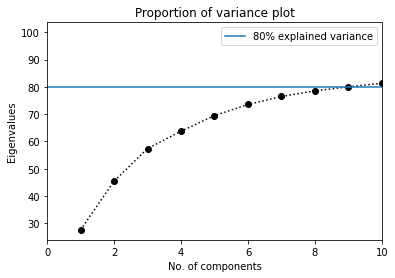

In [19]:
# Scree plot  -> Proportion of variance plot:
plt.plot(np.arange(len(vals)) + 1,100 * vals.cumsum() / sum(vals), 'o:k')

plt.axhline(80, label = '80% explained variance')
plt.title("Proportion of variance plot")
plt.ylabel('Eigenvalues')
plt.xlabel('No. of components')
plt.legend()
plt.xlim(0, 10)
plt.show()

Well... It is clear that did not work as it planned. The first 10 dimentions expain almost 80% of the variability in the data. I suppose There are way to few data points to compute the eigenvalues and eigenvectors. Nevertheless, let's continue with the ploting of the dimentions.

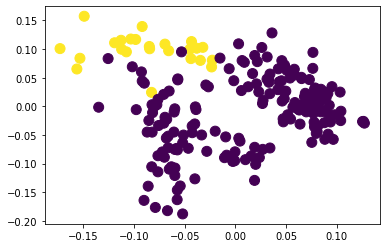

In [29]:
plt.scatter(vecs[:,0], vecs[:,1], c=(variables == 'WT'), s=100)
plt.show()

This is an interesting result dispite our limitation! There are some clustering forming in the data. It seems that the wild type proteins clustered together (in a way...) from the mutant ones. 

Also, in the mutant proteins there is some clustering as well! The first dimention separates the proteins better that the second dimention (obviuslly).

So our initial hypothesis stands correct. In a 3-D space the the structure of the wild type proteins differ from the mutant ones

Another remark: Maybe that distance matrix was not the best one! In order to compute the distances in a better way one should know the structure of the proteins and calculate the distance in a meaningfull matter

In [63]:
pcoa = vecs[:, :10] * vals[:10]**0.5

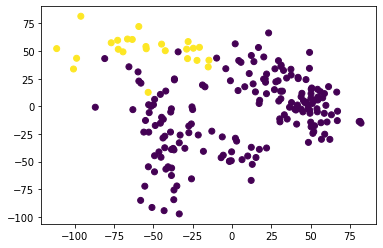

In [62]:
plt.scatter(pcoa[:, 0], pcoa[:, 1], c=(variables == 'WT'))
plt.show()

Maybe it wasn't the best dissicion to do MDS to these data. I would assume if you reduce the dimentions of the data first with another techneque and then perform MDS it would work.

End of Exam

<font color='blue'>
    Because of the large number of observations, this is not the best dataset for MDS; PCA would be preferred. However, MDS is possible on a subset of observations, provided that you select a proper (random) subset. Taking only the first 30 rows only covers part of the data from the wild-type. The rest of the analysis is executed fine, but overall the approach is thus flawed.